# <span style="color:blue">Business Statistics for Axis Insurance</span>


***
<span style="color:blue">Importing relevant libraries and data.</span>
***

In [1]:
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest 
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import anova_lm 
from   scipy.stats import chi2_contingency   
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
working_directory = os.getcwd()
print(working_directory)

/Users/jordan/DBSA Jupyter Notebooks


In [2]:
path = working_directory +'/AxisInsurance.csv'
insuranceData = pd.read_csv(path)

In [3]:
insuranceData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insuranceData.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


***
<span style="color:blue">Confirm completeness of dataframe, check for duplicates, and fix data types.
***

In [5]:
insuranceData.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
insuranceData.shape

(1338, 7)

* There are 1338 observations of 7 variables.

In [7]:
insuranceData["sex"]=insuranceData["sex"].astype("category")
insuranceData["smoker"]=insuranceData["smoker"].astype("category")
insuranceData["region"]=insuranceData["region"].astype("category")

insuranceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


* Sex, smoker, and regions were converted to category from object data.

In [8]:
insuranceData.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* There is no missing data.

In [9]:
insuranceData.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

* There are on duplicate observations.

## <span style="color:blue">Initial analysis of data</span>

***
<span style="color:blue">Descriptive statistics</span>
***

In [10]:
insuranceData.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


* The mean is approximately the same as median for age, children and bmi.
* The mean is larger than the median for charges suggesting the data is right skewed.


In [11]:
insuranceData.describe(include=['category'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


* The data is split pretty evenly between men and women with men being slightly more represented.
* Most customers in this sample are non-smokers. 
* More customers come from the southeast region than any other region.

## <span style="color:blue">Exploratory Data Analysis</span>

***
### <span style="color:blue">Univariate Analysis</span>
***

* For efficiency I utilized the formula presented in the solution to the last module project below.

In [12]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram



***
<span style="color:blue">Observations on Age</span>
***

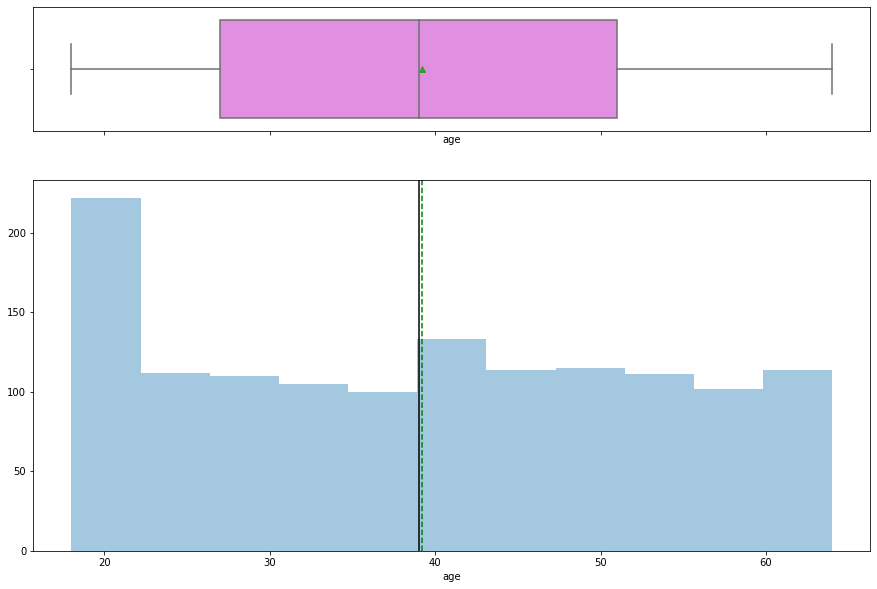

In [13]:
histogram_boxplot(insuranceData["age"])

* Age is pretty evenly distributed with those in their 20s being the largest group.
* There are no outliers.

***
<span style="color:blue">Observations on BMI</span>
***

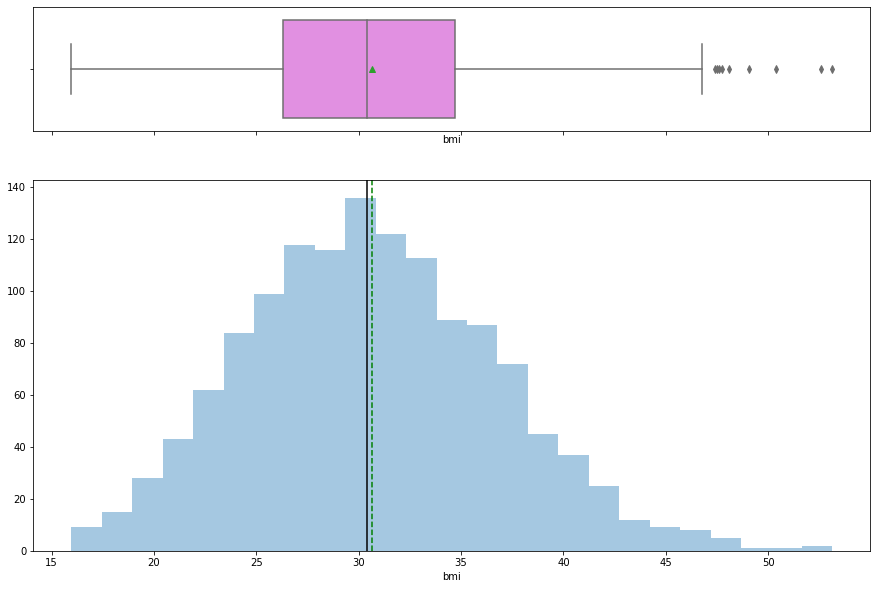

In [14]:
histogram_boxplot(insuranceData["bmi"])

* Bmi looks like a normal distribution.
* There are a few outliers.

***
<span style="color:blue">Observations on Children</span>
***

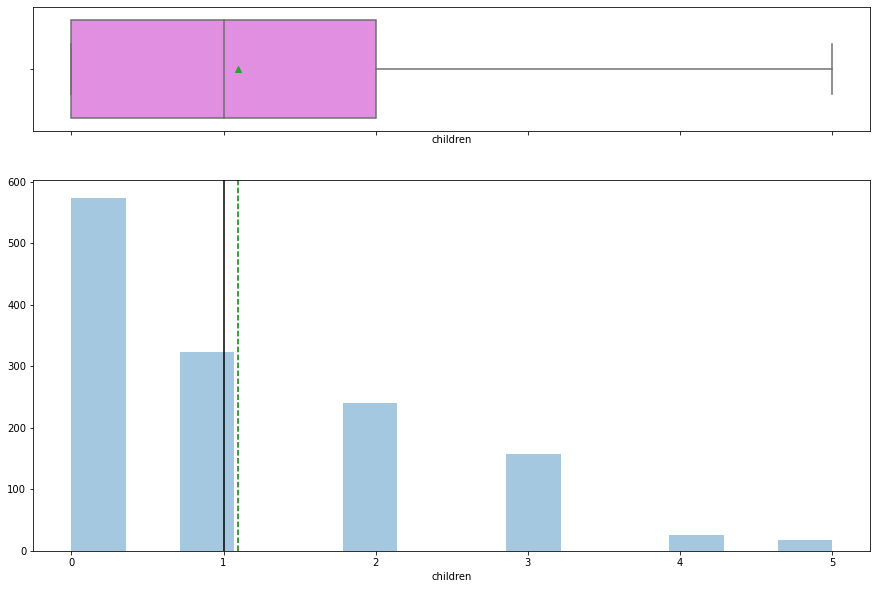

In [15]:
histogram_boxplot(insuranceData["children"])

* The children data is more right skewed than implied by the median and mean.
* 75% of the women have 2 children or less.

***
<span style="color:blue">Observations on Charges</span>
***

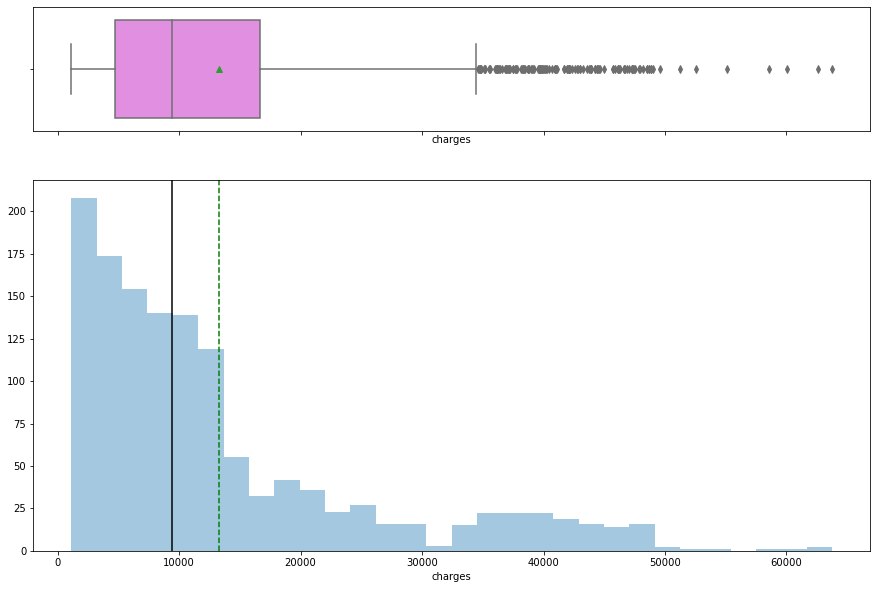

In [16]:
histogram_boxplot(insuranceData["charges"])

* Charges are skewed to the right with several outliers.
* The 75th quartile is around 17,000 which means more than 75% of medical expenses are below 17,000.

* For efficiency I utilized the formula presented in the solution to the last module project below.

In [17]:
def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

***
<span style="color:blue">Observations on Sex</span>
***

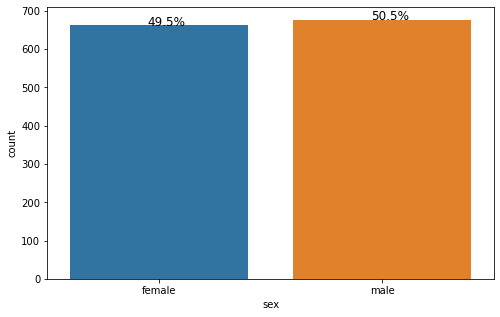

In [18]:
plt.figure(figsize=(8,5))
ax = sns.countplot(insuranceData["sex"])
perc_on_bar(ax,insuranceData["sex"])

* Men and women are evenly represented in the data.

***
<span style="color:blue">Observations on Region</span>
***

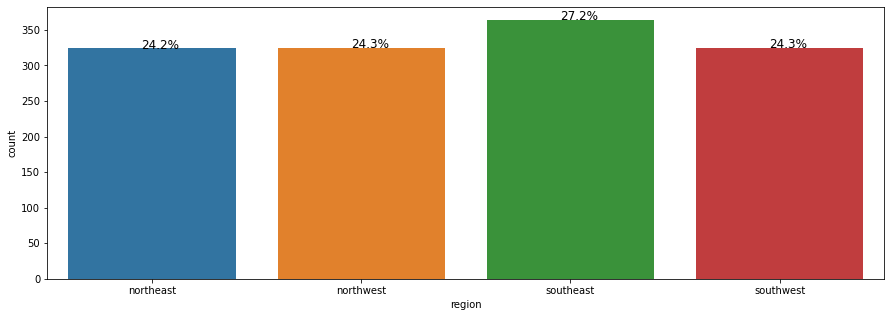

In [19]:
plt.figure(figsize=(15,5))
ax = sns.countplot(insuranceData["region"])
perc_on_bar(ax,insuranceData["region"])

* The proportion of customers living each region is fairly even.
* The southest region has the largest group of customers.

***
<span style="color:blue">Observations on Smokers</span>
***

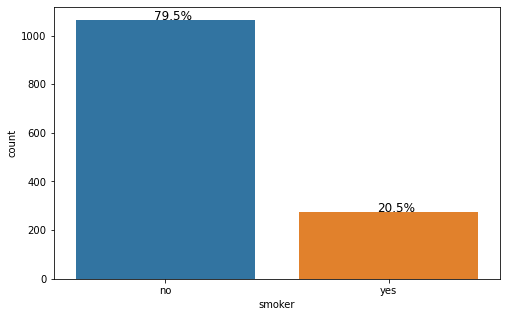

In [20]:
plt.figure(figsize=(8,5))
ax = sns.countplot(insuranceData["smoker"])
perc_on_bar(ax,insuranceData["smoker"])

* Most customers are non smokers.
* Only about 20% are smokers.

***
### <span style="color:blue">Bivariate Analysis</span>
***

***
<span style="color:blue">Correlations among numerical data
***

In [21]:
insuranceData.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

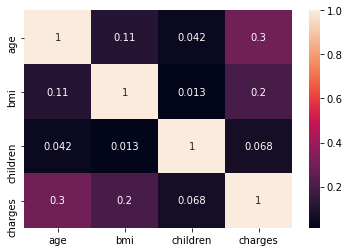

In [22]:
sns.heatmap(insuranceData.corr(),annot=True)

* There are no strong correlations among the numerical data.

***
<span style="color:blue">Correlations including categorical data</span>
***

In [23]:
df_dummies=pd.get_dummies(insuranceData,prefix = None,columns = ['smoker','sex','region'])
df_dummies.head()

,age,bmi,children,charges,smoker_no,smoker_yes,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,1,0,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,1,0,0


In [24]:
df_dummies.corr()

,age,bmi,children,charges,smoker_no,smoker_yes,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.025019,-0.025019,0.020856,-0.020856,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.003750,0.003750,-0.046371,0.046371,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.007673,0.007673,-0.017163,0.017163,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.787251,0.787251,-0.057292,0.057292,0.006349,-0.039905,0.073982,-0.043210
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,1.000000,-1.000000,0.076185,-0.076185,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-1.000000,1.000000,-0.076185,0.076185,0.002811,-0.036945,0.068498,-0.036945
sex_female,0.020856,-0.046371,-0.017163,-0.057292,0.076185,-0.076185,1.000000,-1.000000,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,0.057292,-0.076185,0.076185,-1.000000,1.000000,-0.002425,-0.011156,0.017117,-0.004184
region_northeast,0.002475,-0.138156,-0.022808,0.006349,-0.002811,0.002811,0.002425,-0.002425,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.036945,-0.036945,0.011156,-0.011156,-0.320177,1.000000,-0.346265,-0.320829


<AxesSubplot:>

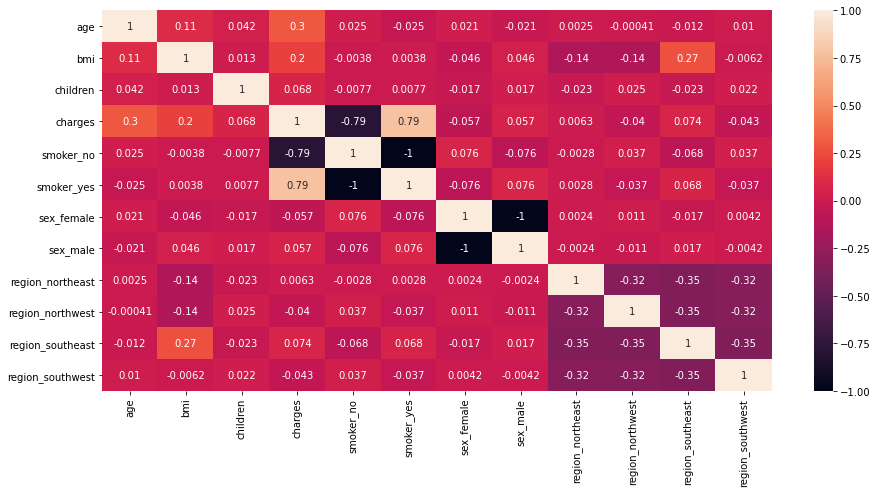

In [25]:
plt.figure(figsize=(15, 7))
sns.heatmap(df_dummies.corr(),annot=True)

* The strongest correlations can be found among smokers and non-smokers.
* There is a strong negative correlation between not smoking and charges. This implies that not smoking may reduce medical expenses.
* There is a strong positive correlation betwen smoking and charges. This implies that smoking may increase medical expenses.
* There is a larger postive correlation between bmi and the southeast region than any other region. This may indicate that the southeast region tends to have higher BMIs than other regions.
* Outside of smoking the next two variables with the highest positive correlations to medical expenses are age and BMI. This may indicate that the three biggest impacts on payouts from the insurance company are status of smoking, BMI, and age.

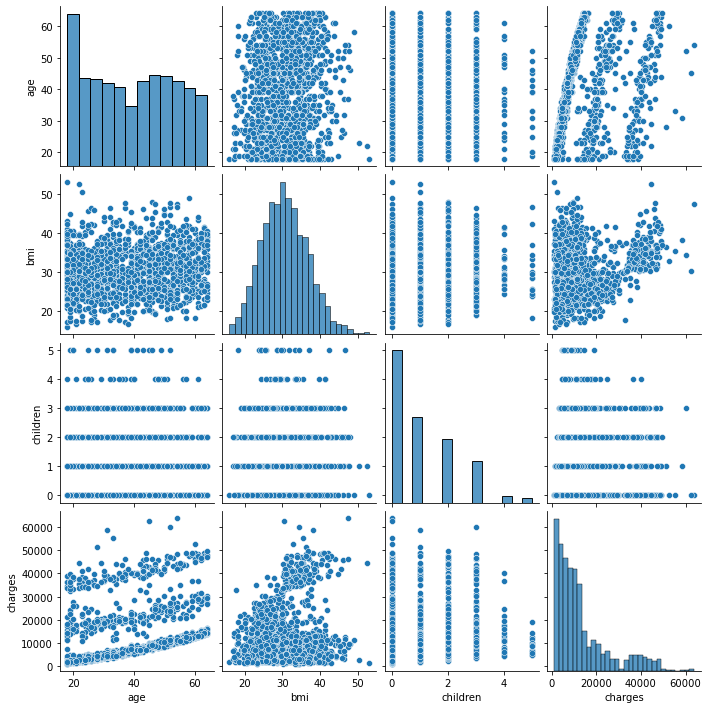

In [26]:
sns.pairplot(data=insuranceData,hue=None)
plt.show()

* again this shows the biggest correlations are between age and charges as well as bmi and charges.

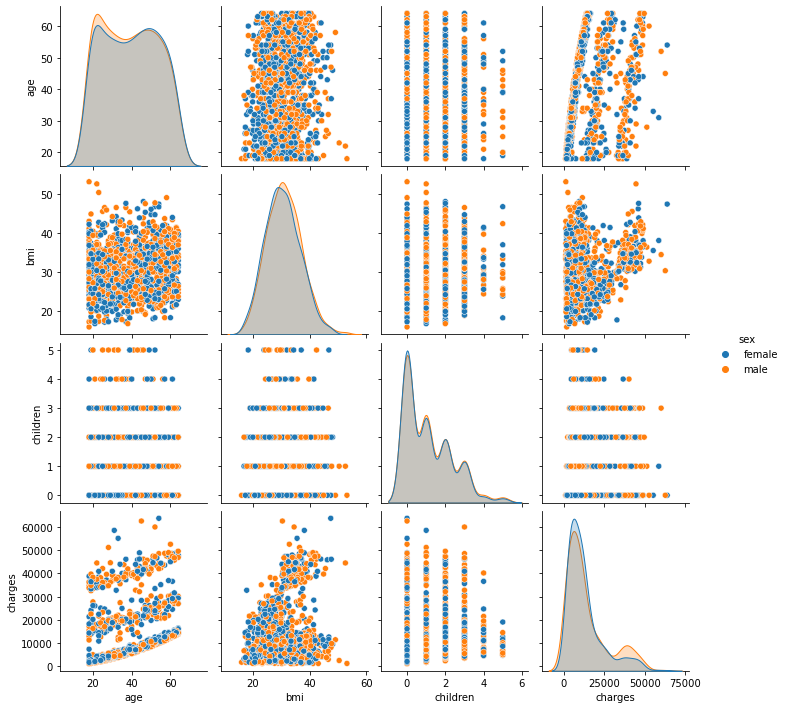

In [27]:
sns.pairplot(data=insuranceData,hue='sex')
plt.show()

* This indicates that male customers tend be older and have a slightly higher bmi than female customers.
* Men tend to have more charges than women.
* This differences are very small and may not be statistically significant.

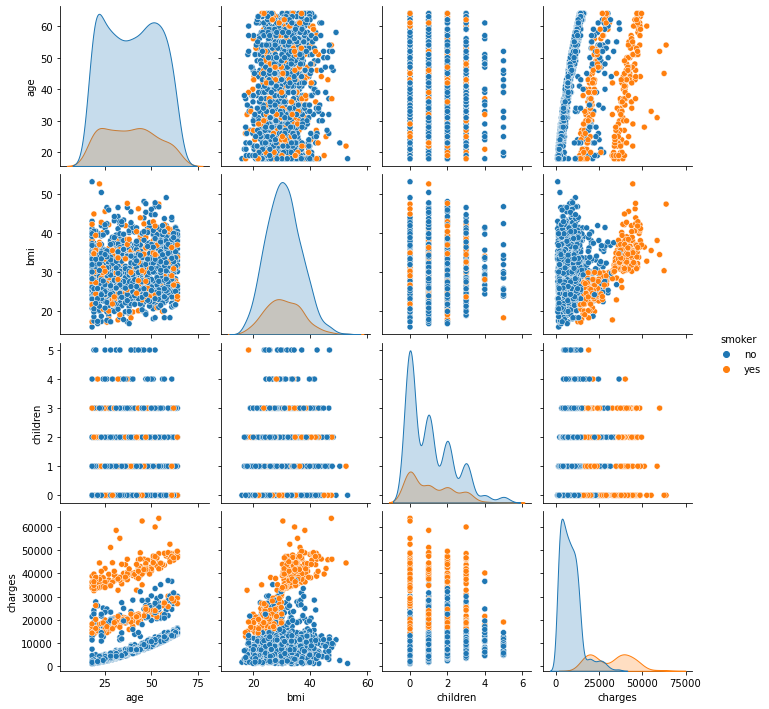

In [28]:
sns.pairplot(data=insuranceData,hue='smoker')
plt.show()

* The age of non-smokers is much higher than the age of smokers.
* The BMI of non-smokers is much higher than that of smokers.
* Non-smokers make up the biggest portion of those with low charges.
* Those with the highest charges are smokers.

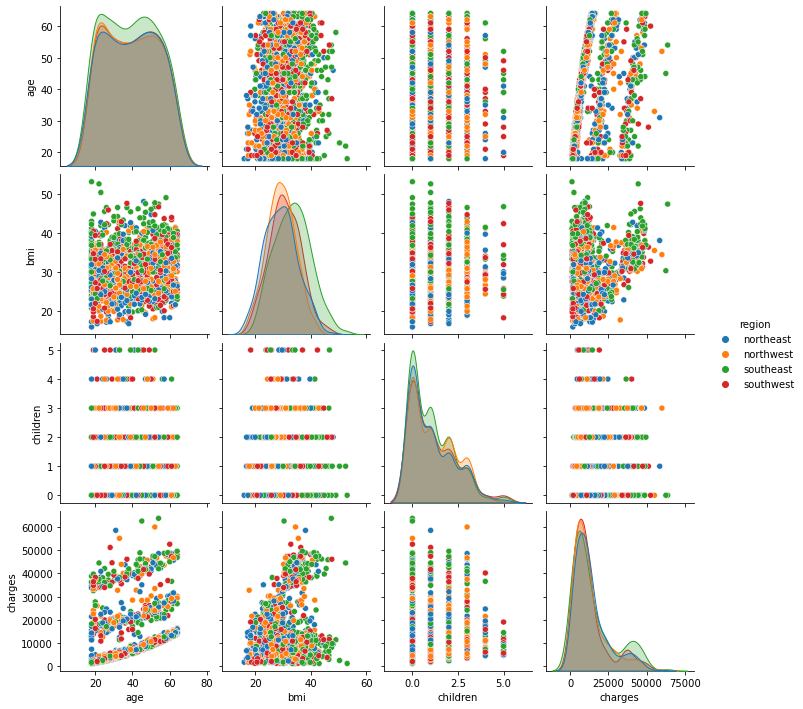

In [29]:
sns.pairplot(data=insuranceData,hue='region')
plt.show()

* The southeast region has some of the oldest customers as well as some of the highest bmi customers.

***
<span style="color:blue">Male vs. Female Expenses vs. Smokers</span>
***

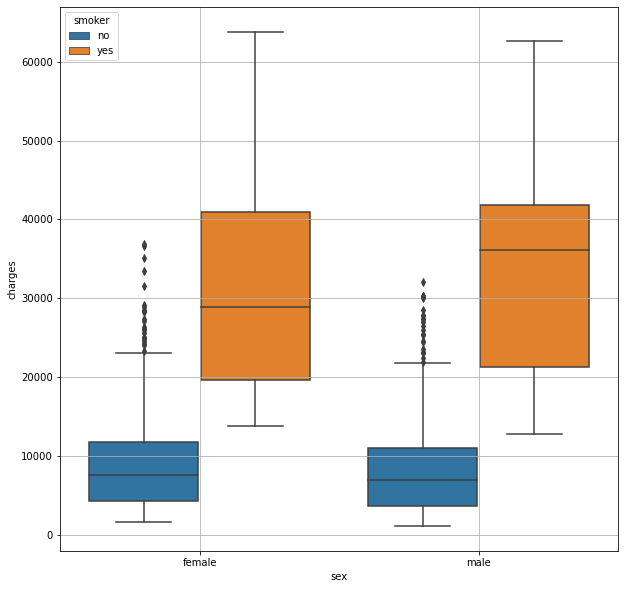

In [45]:
plt.figure(figsize=(10,10))
sns.boxplot(x="sex", y="charges", data=insuranceData,hue='smoker')
plt.grid()
plt.show()

* Across genders smokers tend to have higher medical costs.
* Among all people men and women tend to have similare medical costs with men having a higher max and male smokers having a higher average cost.

***
<span style="color:blue">Male vs. Female BMI </span>
***

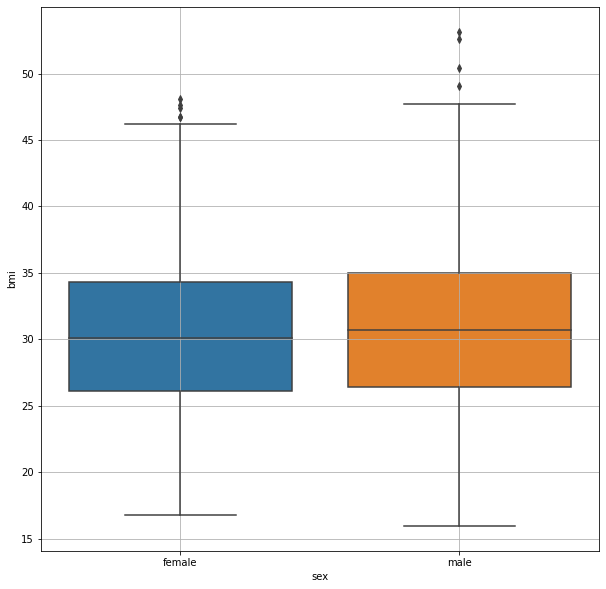

In [46]:
plt.figure(figsize=(10,10))
sns.boxplot(x="sex", y="bmi", data=insuranceData)
plt.grid()
plt.show()

* Male vs female bmi is very similar, but men have slightly higher average.

***
<span style="color:blue">Woman with Children vs. BMI</span>
***

In [40]:
Women = insuranceData[insuranceData.sex=='female']
Women.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692


In [41]:
Women.describe()

,age,bmi,children,charges
count,662.000000,662.000000,662.000000,662.000000
mean,39.503021,30.377749,1.074018,12569.578844
std,14.054223,6.046023,1.192115,11128.703801
min,18.000000,16.815000,0.000000,1607.510100
25%,27.000000,26.125000,0.000000,4885.158700
50%,40.000000,30.107500,1.000000,9412.962500
75%,51.750000,34.313750,2.000000,14454.691825
max,64.000000,48.070000,5.000000,63770.428010


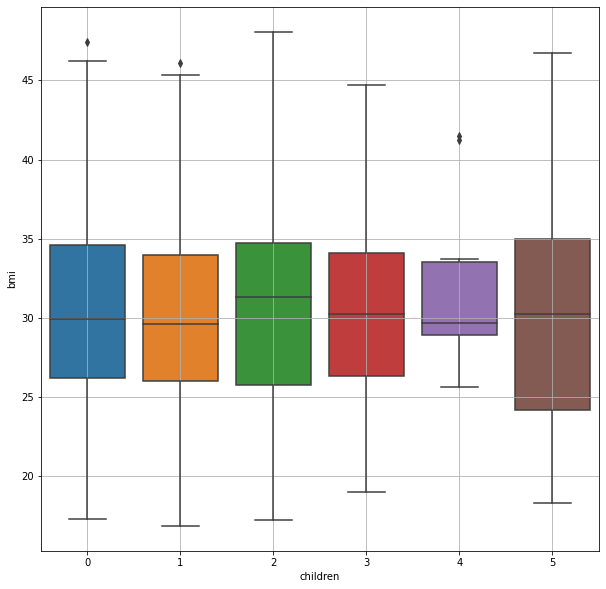

In [47]:
plt.figure(figsize=(10,10))
sns.boxplot(x="children", y="bmi", data=Women)
plt.grid()
plt.show()

***
<span style="color:blue">Smokers vs. Non-smokers Expenses</span>
***

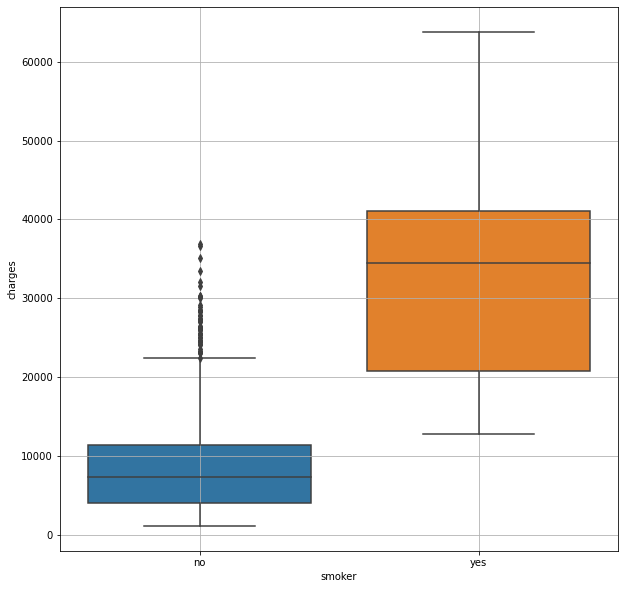

In [48]:
plt.figure(figsize=(10,10))
sns.boxplot(x="smoker", y="charges", data=insuranceData)
plt.grid()
plt.show()

* Smokers consistently have much higher expenses than non-smokers.
* Non-smokers have a several outliers towards the high expense side.

***
<span style="color:blue">Smokers by Region</span>
***

*** <span style="color:blue">Count of Nonsmokers</span> 

In [70]:
Nonsmoking = insuranceData[insuranceData.smoker=='no']
Nonsmoking.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [71]:
print(Nonsmoking['region'].value_counts())

southeast    273
southwest    267
northwest    267
northeast    257
Name: region, dtype: int64


*** <span style="color:blue">Count of Smokers</span> 

In [68]:
Smoking = insuranceData[insuranceData.smoker=='yes']
Smoking.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [56]:
print(Smoking['region'].value_counts())

southeast    91
northeast    67
southwest    58
northwest    58
Name: region, dtype: int64


*** <span style="color:blue">Analysis</span> 

In [62]:
region_smoke = {'southeast':91,'northeast':67,'southwest':58,'northwest':58}

In [63]:
names1 = list(region_smoke.keys())
values1 = list(region_smoke.values())

Text(0, 0.5, 'Smoker Count')

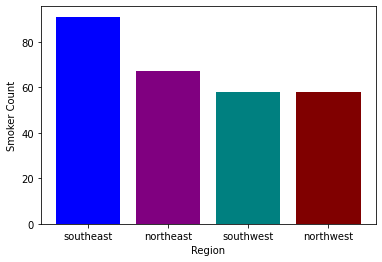

In [65]:

plt.bar(names1,values1,color=['blue','purple','teal','maroon'])
plt.xlabel('Region')
plt.ylabel('Smoker Count')




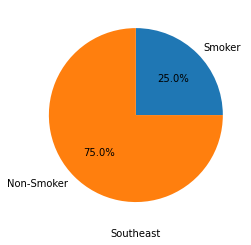

In [74]:
Model = ['Smoker','Non-Smoker']
Number = [91,273]
plt.pie(Number,labels=Model,autopct='%0.1f%%')
plt.xlabel('Southeast')
plt.show()

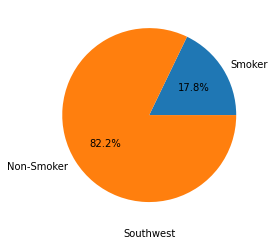

In [75]:
Model = ['Smoker','Non-Smoker']
Number = [58,267]
plt.pie(Number,labels=Model,autopct='%0.1f%%')
plt.xlabel('Southwest')
plt.show()

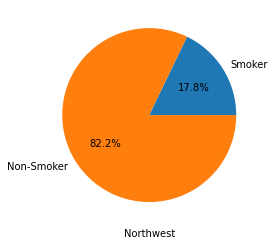

In [76]:
Model = ['Smoker','Non-Smoker']
Number = [58,267]
plt.pie(Number,labels=Model,autopct='%0.1f%%')
plt.xlabel('Northwest')
plt.show()

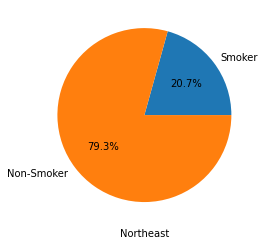

In [77]:
Model = ['Smoker','Non-Smoker']
Number = [67,257]
plt.pie(Number,labels=Model,autopct='%0.1f%%')
plt.xlabel('Northeast')
plt.show()

* The southeast has the highest number and proportion of smokers.
* The number and proportion of smokers in the southwest and northwest are equal.

## <span style="color:blue">Hypothesis Testing</span>

***
<span style="color:blue">BMI of Men vs. Women</span>
***

* The above EDA indicates that the bmi of men tends to be higher than women indicating that the means may not be equal.

<u>Hypothesis:<u>

H0: The mean BMI of individuals in the sample with respect to gender is equal.

H1: The mean BMI of individuals in the sample with respect to gender is not equal.

Signigicance level: a = 0.05

In [82]:
formula = 'bmi ~ C(sex)'
model = ols(formula, insuranceData).fit()
aov_table = anova_lm(model)
print(aov_table)

              df        sum_sq     mean_sq        F    PR(>F)
C(sex)       1.0    106.912532  106.912532  2.87897  0.089976
Residual  1336.0  49613.287854   37.135695      NaN       NaN


* Since 0.089976 > 0.05, we fail to reject the null.
* This indicates that the BMI of men and women is not statistically different.

***
<span style="color:blue">Cost of Smokers vs. Non-smokers</span>
***

* The above EDA indicates that the average medical cost of smokers is higher than the average medical costs of non-smokers. 

<u>Hypothesis:<u>

H0: The mean medical expenses of smokers is higher than non-smokers.

H1: The  mean medical expenses of smokers is not higher than non-smokers.

Signigicance level: a = 0.05

In [92]:
formula = 'charges ~ C(smoker)'
model = ols(formula, insuranceData).fit()
aov_table = anova_lm(model)
print(aov_table)

               df        sum_sq       mean_sq            F         PR(>F)
C(smoker)     1.0  1.215199e+11  1.215199e+11  2177.614868  8.271436e-283
Residual   1336.0  7.455432e+10  5.580413e+07          NaN            NaN


* Since 8.271436e-283 < 0.05, we reject the null.
* This indicates that the mean medical expenses of smoker is not higher than non-smokers.

***
<span style="color:blue">Average BMI of women with 0, 1, and 2 Children</span>
***

* The above EDA indicates that the average BMI of women with 0, 1, and 2 children are similar to each other. 

<u>Hypothesis:<u>

H0: The mean BMI of women with 0, 1, and 2 children are equal to each other.

H1: Among the mean BMIs for women with 0, 1, and 2 children at least one is not equal to the others.

Signigicance level: a = 0.05

In [114]:
women_5 = Women[Women.children != 5]
women_4 = women_5[women_5.children != 4]
women_3 = women_4[women_4.children != 3]
women_3.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510


In [120]:
formula = 'bmi ~ C(children)'
model = ols(formula, insuranceData).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq    mean_sq         F    PR(>F)
C(children)     5.0     65.112017  13.022403  0.349327  0.882868
Residual     1332.0  49655.088370  37.278595       NaN       NaN


* Since 0.882868 > 0.05, we fail to reject the null.
* This indicates that there is no difference among the BMI means of women with 0, 1, and 2 children.

***
<span style="color:blue">Proportion of smokers across regions</span>
***

* The above EDA indicates that proportion of smokers in the southeast is higher than the proportion of smokers in other regions. 

<u>Hypothesis:<u>

H0: The proportion of smokers in each region are equal.

H1: The proportion of smokers in each region is not equal.

Signigicance level: a = 0.05

In [84]:
dfRegion = pd.DataFrame({'Southeast': [273, 91], 'Southwest': [267, 58], 'Northwest': [267, 58],'Northeast': [257, 67]}, index = ['Non-smoker', 'Smoker'])
dfRegion

,Southeast,Southwest,Northwest,Northeast
Non-smoker,273,267,267,257
Smoker,91,58,58,67


In [90]:
chi2, pval, dof, exp_freq = chi2_contingency(dfRegion, correction = False)

In [91]:
pval

0.06171954839170547

* Since 0.0617195 > 0.05, we fail to reject the null.
* This indicates that there is no difference among the proportion of smokers in each region.